In [103]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from ipynb.fs.full.functions import compute_ols, compute_ols_intercept, plot_residuals

## Load the data:

In [104]:
data = pd.read_csv('data/tobacco_data.csv')

# Drop columns 'Country' and 'Year', as the former is just and index for rows of data and the later is the same for all.
# We also drop tobacco usage of female in our investigation about males, 


data.drop(['Year', 'Country'], axis=1, inplace=True)

# However, one other approach could be keeping this parameter as a dependent variable and then make the model.

# So now all the parameters are numerical

data.head()

,Price_2015,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
0,1.905,51.2,7.6,65.195,4.959,3.920,8,8,3,50.0,8
1,2.220,29.5,18.4,75.045,6.574,1.310,7,10,5,50.0,8
2,1.370,52.3,1.5,34.165,4.350,3.945,5,2,0,50.0,3
3,15.850,16.7,13.1,58.515,7.284,2.285,6,2,0,83.0,6
4,6.060,35.5,34.8,74.835,7.200,1.225,7,8,5,65.0,2


## Statistical preprocessing

### Exploring the descriptive statistics of the variables

In [105]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument include='all', 
# However, we have handeled the categorical features and made score for each.
# As it can be seen, we have also handled the Nan values. 
# So for each feature of each row of data we have value in the table.
 
data.describe()


,Price_2015,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,3.615388,33.366990,11.729126,55.865243,5.586816,4.549126,6.330097,5.563107,3.058252,55.779150,4.543689
std,3.224972,12.935514,10.371725,22.005910,1.118552,4.340402,2.202442,3.126954,2.428690,14.703264,3.031782
min,0.355000,8.900000,0.200000,7.580000,3.340000,0.550000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,1.080000,22.750000,2.700000,36.255000,4.683500,1.770000,6.000000,3.000000,1.000000,50.000000,1.000000
50%,2.545000,31.500000,8.300000,62.000000,5.360000,2.760000,7.000000,6.000000,3.000000,55.000000,5.000000
75%,4.675000,43.000000,19.700000,75.217500,6.539500,4.815000,8.000000,8.000000,5.000000,65.000000,8.000000
max,15.850000,76.200000,39.700000,85.990000,7.587000,19.600000,8.000000,10.000000,7.000000,90.000000,8.000000


### Exploring the Probability Distribution Functions (PDFs)

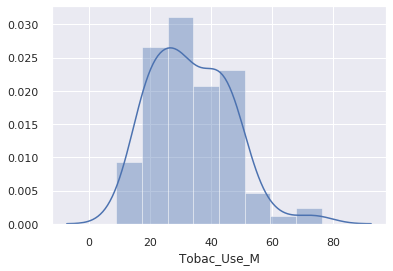

In [106]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['Tobac_Use_M'])

As it's ilustrated with PDF, the distribution is slightly skewed right. One solution is to drop the top outliers, but we'll postpone it to the end of our investigation as it's not much significant.

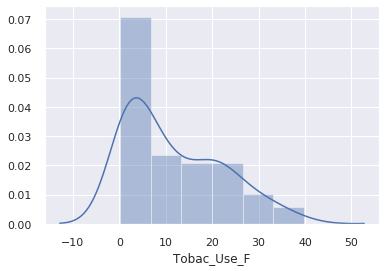

In [107]:
sns.distplot(data['Tobac_Use_F'])

The PDF for female is also skewed right with more skewness. Let's check and resolve it after general preprocessing over regressors.

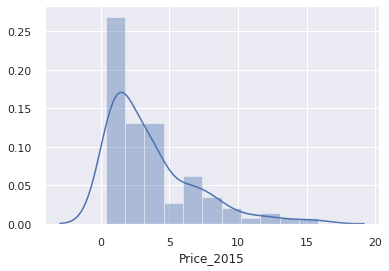

In [108]:
sns.distplot(data['Price_2015'])

The distribution is skewed a little to left. It seems some outliers that could be removed.

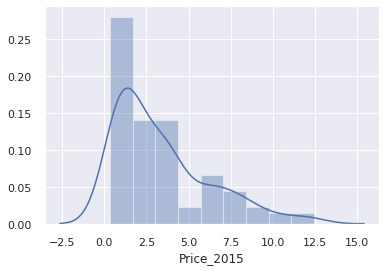

In [109]:
# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Afford_2015' variable
q = data['Price_2015'].quantile(0.99)
# Then we can create a new df, with the condition that all Tobac_Use_M must be below the 99 percentile of 'Afford_2015'
data_1 = data[data['Price_2015']<q]
# In this way we have essentially removed the top 1% of the data about 'Afford_2015'
data_1.describe(include='all')
sns.distplot(data_1['Price_2015'])

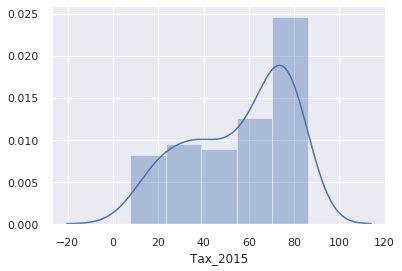

In [110]:
sns.distplot(data_1['Tax_2015'])

Again the distribution is a little skewed left this time, but this time it's not because of outliers and so could be ignored. 

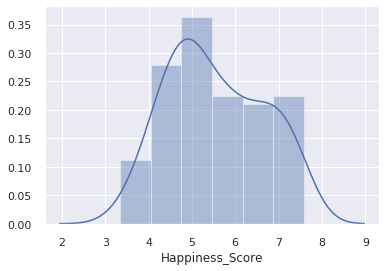

In [111]:
sns.distplot(data_1['Happiness_Score'])

This time, the data seems fairly distributed.

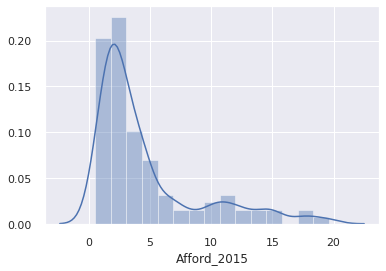

In [112]:
sns.distplot(data_1['Afford_2015'])

Data is obviously skewed right and so droping the outlier seems indispensible.

### Dealing with outliers

In [113]:

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Afford_2015' variable
q = data_1['Afford_2015'].quantile(0.99)
# Then we can create a new df, with the condition that all Tobac_Use_M must be below the 99 percentile of 'Afford_2015'
data_2 = data_1[data_1['Afford_2015']<q]
# In this way we have essentially removed the top 1% of the data about 'Afford_2015'
data_2.describe(include='all')

,Price_2015,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,3.433687,33.757576,11.733333,56.257677,5.578556,4.313283,6.303030,5.494949,3.010101,55.426792,4.464646
std,2.831257,12.945034,10.463571,22.089786,1.091719,3.901031,2.233577,3.108165,2.409568,14.164293,3.048295
min,0.355000,8.900000,0.300000,7.580000,3.340000,0.550000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,1.080000,23.300000,2.700000,37.632500,4.690000,1.770000,6.000000,3.000000,1.000000,50.000000,1.000000
50%,2.545000,31.600000,7.900000,62.750000,5.360000,2.760000,7.000000,6.000000,3.000000,55.000000,5.000000
75%,4.352500,43.300000,19.700000,75.400000,6.495000,4.750000,8.000000,8.000000,5.000000,65.000000,8.000000
max,12.420000,76.200000,39.700000,85.990000,7.587000,17.335000,8.000000,10.000000,7.000000,85.000000,8.000000


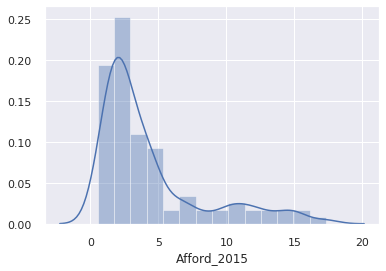

In [114]:
sns.distplot(data_2['Afford_2015'])

The distribution is not still normal, but slightly better.

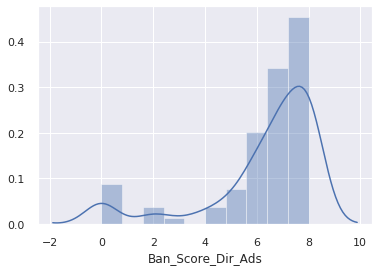

In [115]:
sns.distplot(data_2['Ban_Score_Dir_Ads'])

This time the left skewness is ovious. So to remove least outlires, we do as:

In [116]:
q = data_2['Ban_Score_Dir_Ads'].quantile(0.01)

data_3 = data_2[data_2['Ban_Score_Dir_Ads']>q]

data_3.describe(include='all')

,Price_2015,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
count,92.000000,92.000000,92.000000,92.00000,92.00000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,3.547174,33.347826,12.140217,57.44000,5.62162,4.078859,6.782609,5.836957,3.228261,56.374103,4.565217
std,2.886237,12.223158,10.695938,21.94870,1.11260,3.823184,1.443638,2.928740,2.358540,13.831716,3.075262
min,0.355000,8.900000,0.300000,7.58000,3.34000,0.550000,2.000000,0.000000,0.000000,20.000000,0.000000
25%,1.090000,23.175000,2.750000,41.48750,4.76450,1.766250,6.000000,3.000000,1.000000,50.000000,1.000000
50%,2.837500,31.800000,8.100000,66.10000,5.45300,2.657500,7.000000,6.000000,3.000000,60.000000,5.000000
75%,5.093750,43.150000,20.050000,75.81125,6.57425,4.407500,8.000000,8.000000,5.000000,65.000000,8.000000
max,12.420000,70.200000,39.700000,85.99000,7.58700,17.335000,8.000000,10.000000,7.000000,85.000000,8.000000


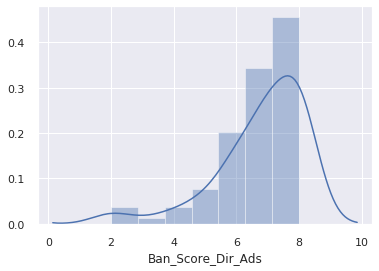

In [117]:
sns.distplot(data_3['Ban_Score_Dir_Ads'])

So we'll have slightly better result by removeing outliers from bottom of data.

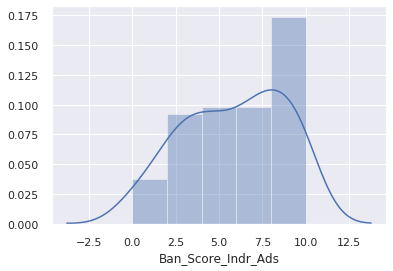

In [118]:
sns.distplot(data_3['Ban_Score_Indr_Ads'])

Fairly normally distributed.

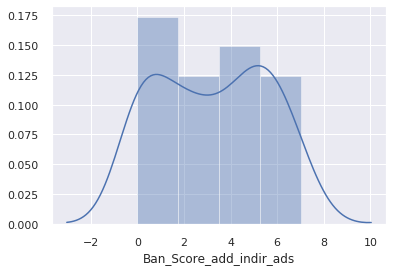

In [119]:
sns.distplot(data_3['Ban_Score_add_indir_ads'])

Fairly normally distributed.

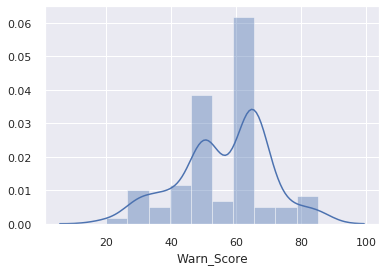

In [120]:
sns.distplot(data_3['Warn_Score'])

Fairly normally distributed.

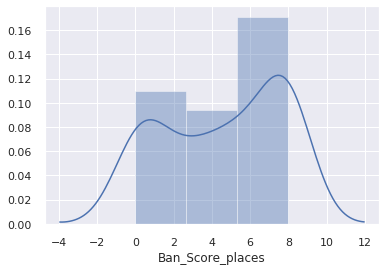

In [121]:
sns.distplot(data_3['Ban_Score_places'])

Fairly normally distributed.

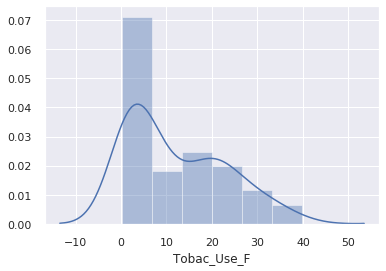

In [122]:
# Checking the distribution of tobaco usage for males again, shows us fairly normal distribution.
data_cleaned = data_3
sns_plot = sns.distplot(data_cleaned['Tobac_Use_F'])
sns_plot.figure.savefig("plots/Female_PDF.png")

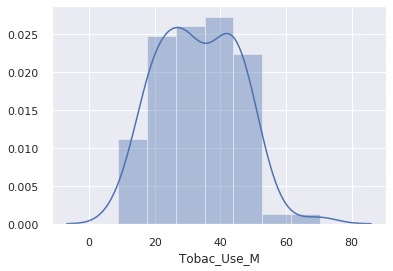

In [123]:
# Checking the distribution of tobaco usage for males again, shows us fairly normal distribution.
data_cleaned = data_3
sns_plot = sns.distplot(data_cleaned['Tobac_Use_M'])
sns_plot.figure.savefig("plots/Male_PDF.png")

Data distribution is more normalized aftre removing outliers.

In [124]:

data_cleaned.to_csv('data/clean_data.csv',  index=False)